# Predicting extreme wind speeds in Denmark

The goal of this notebook is to predict extreme wind speeds in Denmark using data from 1.1.1995 to 31.12.2017 (data from www.tutiempo.net). Increasing extreme weather events in combination with ramping up the wind power production may obviously lead to changes in the wind speeds.
In order to investigate the influences of those recent events and identifiyng trends, data from five different weather stations all over Denmark is compared. The data will be modelled in a Bayesian framework aiming at providing information on the probability of storm occurrences in years to come.

# Model description

The likelihood of the extreme wind speeds will be modeled using a generalized pareto distribution that is used for extreme value analysis. Therefore, a cut-off wind speed is needed at which the data will be trimmed. The generalized pareto distribution has three parameters, the location parameter $ \mu $, the scale parameter $\sigma$ and the shape parameter $\xi$. The probability density function is given as
$$
f_{\xi,\mu,\sigma}(x) = \frac{1}{\sigma} \left( 1 + \frac{\xi(x-\mu)}{\sigma} \right)^{\left( -\frac{1}{\xi} - 1 \right)}
$$
<br>
where the validity is given for x $ \geq \mu$ when $\xi  \geq$ 0 and $\mu \leq x \leq \mu - \sigma/\xi$ when $\xi < 0$. In order to find appropriate tail cut off values, Q-Q plots were used to identify possible candidates. This has to ensure a homogeneous behavior of the tail as well as there are enough data points left in the tail.

# Setting up the python environment
For the following data visualizations, in a first step the python environment is prepared.

In [29]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

import pystan

In [7]:
# default plot settings
plt.rc('font', size = 12)

In [62]:
# load data 
city_name_end = ['aar']#['cop','aar','aal','ode','esb']
for my_city in city_name_end:
    wind_data = np.load('winddata'+my_city+'.npy')
    # Remove the missing data points (current '-1' values) and convert to float
    ii = np.where(wind_data != '-1')
    wind_data = wind_data[ii]
    wind_data = np.array(wind_data, dtype= 'float64')

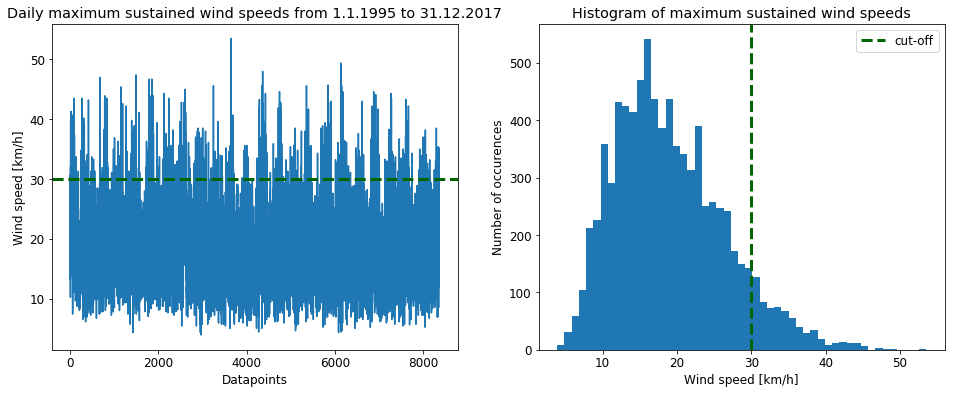

In [25]:
fig, axes = plt.subplots(ncols = 2, figsize = (16,6))

ax = axes[0]
ax.plot(wind_data)
ax.set_title('Daily maximum sustained wind speeds from 1.1.1995 to 31.12.2017')
ax.set_xlabel('Datapoints'); ax.set_ylabel('Wind speed [km/h]')
ax.axhline(y= 30, color = 'darkgreen', linestyle = 'dashed', lw = 3)

ax = axes[1]
ax.hist(wind_data.astype(np.float),bins='auto')
ax.set_title('Histogram of maximum sustained wind speeds')
ax.axvline(x= 30, color = 'darkgreen', linestyle = 'dashed', lw = 3, label = 'cut-off')
ax.set_xlabel('Wind speed [km/h]'); ax.set_ylabel('Number of occurences'); ax.legend()

/home/felix/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2062: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/home/felix/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/home/felix/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


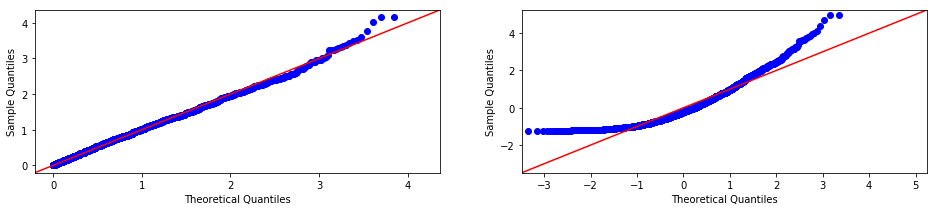

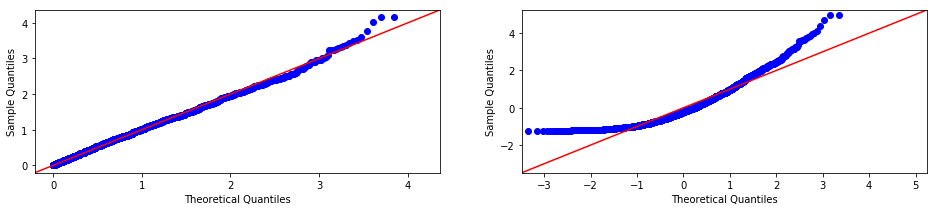

In [67]:
# now test the cut-off
tail_cutoff = 30
tail_bool = wind_data > tail_cutoff
tail_data = wind_data[tail_bool]

# visualize fit to GPD distribution
fig, axes = plt.subplots(ncols = 2, figsize = (16,3))

ax = axes[0]
qqp = sm.ProbPlot(tail_data - 30, stats.genpareto , fit= True)
qqp.qqplot(line='45',ax = ax)

ax = axes[1]
qqp = sm.ProbPlot(tail_data - 30, stats.norm , fit= True)
qqp.qqplot(line='45',ax = ax)
